In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

In [2]:
#Libraries used
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
#importing dataset in 'dataset' variable
dataset =  pd.read_csv("../input/Mall_Customers.csv")

In [7]:
dataset.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [9]:
X = dataset[["Spending Score (1-100)","Age"]].iloc[:,:].values
dataset.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [10]:
# Checking for null values 
dataset.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

>  **Exploratory Data Analysis (EDA)**

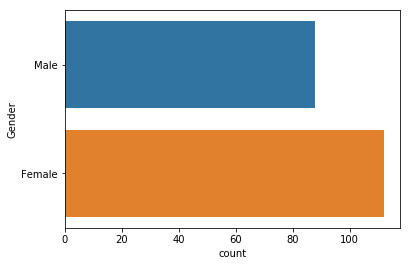

In [11]:
sns.countplot(y = 'Gender', data = dataset)

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


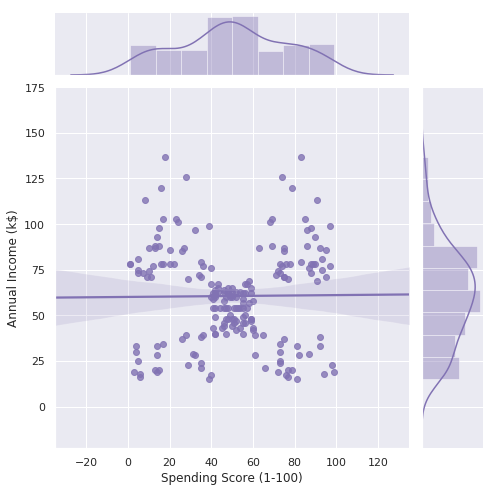

In [12]:
sns.set(style="darkgrid")
g = sns.jointplot("Spending Score (1-100)", "Annual Income (k$)", data=dataset, kind="reg",
                   color="m", height=7)

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


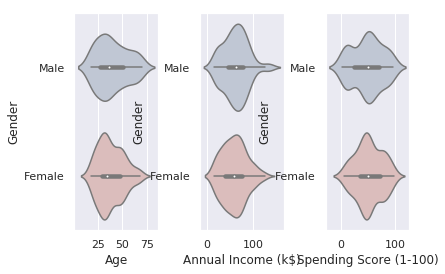

In [15]:
n=0
for cols in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    n +=1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    sns.violinplot(x = cols , y = 'Gender' , data = dataset , palette = 'vlag')

***Encoding Gender Attribute For CLustering***

In [17]:
from sklearn.preprocessing import LabelEncoder
LabelEncoder = LabelEncoder()
dataset["Gender"] = LabelEncoder.fit_transform(dataset["Gender"])


/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


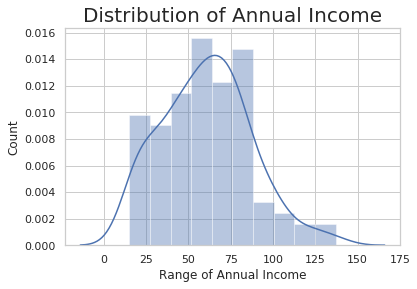

In [18]:
sns.set(style = 'whitegrid')
sns.distplot(dataset['Annual Income (k$)'])
plt.title('Distribution of Annual Income', fontsize = 20)
plt.xlabel('Range of Annual Income')
plt.ylabel('Count')
plt.show()

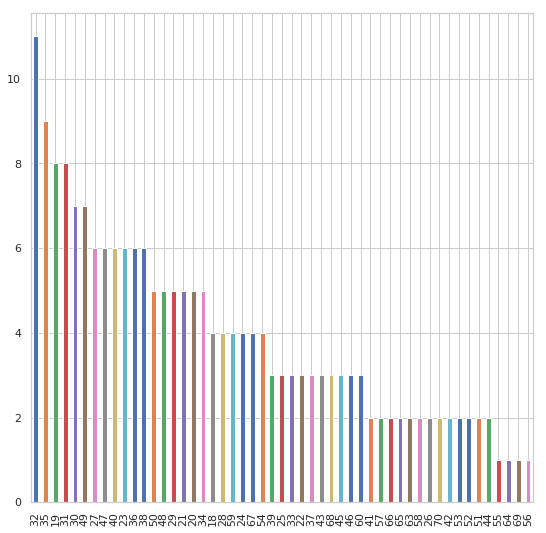

In [19]:
dataset['Age'].value_counts().plot.bar(figsize = (9, 9))

****Clustering target customers with whom we can start marketing strategy****

**Clustering Spending Score According to Age**

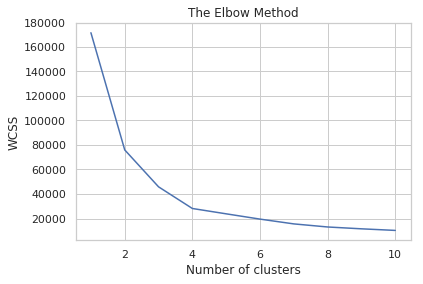

In [20]:
from sklearn.cluster import KMeans
WCSS = []
intertia = []
for i in range(1,11):
    Kmeans = (KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10,
                    random_state = 0))
    Kmeans.fit(X)
    WCSS.append(Kmeans.inertia_)
plt.plot(np.arange(1,11),WCSS)
plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

In [21]:
Kmeans = KMeans(n_clusters = 4, init = 'k-means++',max_iter = 300, n_init = 10,
                    random_state = 0)
centroids = Kmeans.fit_predict(X)

Text(0, 0.5, 'Age')

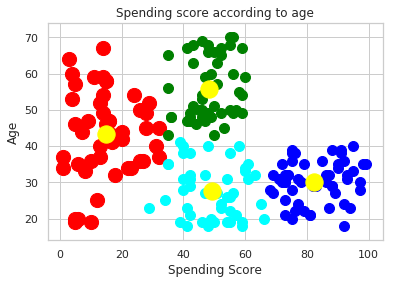

In [22]:
plt.scatter(X[centroids == 0, 0], X[centroids == 0,1], c = 'red' , s = 200 )
plt.scatter(X[centroids == 1, 0], X[centroids == 1,1], s = 100, c = 'blue')
plt.scatter(X[centroids == 2, 0], X[centroids == 2,1], s = 100, c = 'cyan')
plt.scatter(X[centroids == 3, 0], X[centroids == 3,1], s = 100, c = 'green')
plt.scatter(Kmeans.cluster_centers_[:,0],Kmeans.cluster_centers_[:,1],s=300, c = 'yellow')
plt.title("Spending score according to age")
plt.xlabel("Spending Score")
plt.ylabel("Age")

**Spending Score according to annual Income**

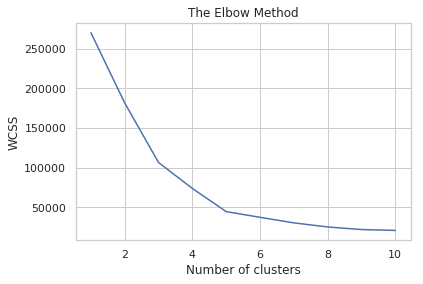

In [23]:
X1 = dataset[["Spending Score (1-100)","Annual Income (k$)"]].iloc[:,:].values
intertia = []
WCSS = []
for i in range(1,11):
    Kmeans = (KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10,
                    random_state = 0))
    Kmeans.fit(X1)
    WCSS.append(Kmeans.inertia_)
plt.plot(np.arange(1,11),WCSS)
plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

In [46]:
Kmeans = KMeans(n_clusters = 5, init = 'k-means++',max_iter = 300, n_init = 10,
                    random_state = 0)
centroids = Kmeans.fit_predict(X1)

Text(0, 0.5, 'Annual Income')

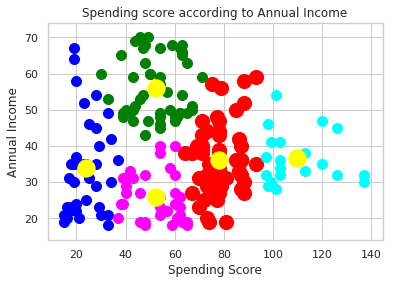

In [47]:
plt.scatter(X1[centroids == 0, 0], X1[centroids == 0,1], c = 'red' , s = 200 )
plt.scatter(X1[centroids == 1, 0], X1[centroids == 1,1], s = 100, c = 'blue')
plt.scatter(X1[centroids == 2, 0], X1[centroids == 2,1], s = 100, c = 'cyan')
plt.scatter(X1[centroids == 3, 0], X1[centroids == 3,1], s = 100, c = 'green')
plt.scatter(X1[centroids == 4, 0], X1[centroids == 4,1], s = 100, c = 'Magenta')
plt.scatter(Kmeans.cluster_centers_[:,0],Kmeans.cluster_centers_[:,1],s=300, c = 'yellow')
plt.title("Spending score according to Annual Income")
plt.xlabel("Spending Score")
plt.ylabel("Annual Income")

**Annual Income according to Age**

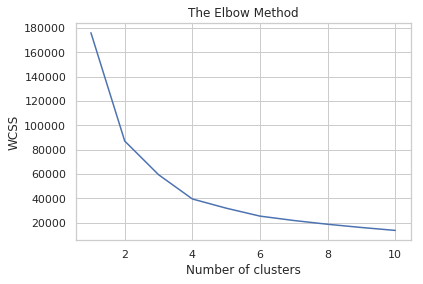

In [41]:
X2 = dataset[["Annual Income (k$)", "Age"]].iloc[:,:].values
intertia = []
WCSS = []
for i in range(1,11):
    Kmeans = (KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10,
                    random_state = 0))
    Kmeans.fit(X1)
    WCSS.append(Kmeans.inertia_)
plt.plot(np.arange(1,11),WCSS)
plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

In [49]:
Kmeans = KMeans(n_clusters = 4, init = 'k-means++',max_iter = 300, n_init = 10,
                    random_state = 0)
centroids = Kmeans.fit_predict(X1)

Text(0, 0.5, 'Age')

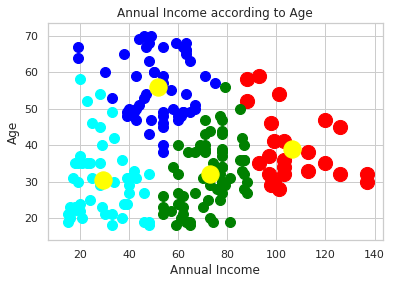

In [50]:
plt.scatter(X2[centroids == 0, 0], X1[centroids == 0,1], c = 'red' , s = 200 )
plt.scatter(X2[centroids == 1, 0], X1[centroids == 1,1], s = 100, c = 'blue')
plt.scatter(X2[centroids == 2, 0], X1[centroids == 2,1], s = 100, c = 'cyan')
plt.scatter(X2[centroids == 3, 0], X1[centroids == 3,1], s = 100, c = 'green')
plt.scatter(Kmeans.cluster_centers_[:,0],Kmeans.cluster_centers_[:,1],s=300, c = 'yellow')
plt.title("Annual Income according to Age")
plt.xlabel("Annual Income")
plt.ylabel("Age")